Neccessary Imports

In [1]:
import numpy as np
import pandas as pd
import warnings
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

warnings.filterwarnings('ignore')

c:\Users\SS\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\__init__.py:169: UserWarning: A NumPy version >=1.18.5 and <1.26.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Generate Synthetic Data

In [2]:
np.random.seed(0)
data_size = 200
features = np.random.rand(data_size, 2)  # Two features: visit duration and pages visited
labels = (features[:, 0] + features[:, 1] > 1).astype(int)  # Purchase (1) or not (0)

# Convert to DataFrame for easier manipulation
df = pd.DataFrame(features, columns=['VisitDuration', 'PagesVisited'])
df['Purchase'] = labels

Preprocess the Data

In [3]:
X_train, X_test, y_train, y_test = train_test_split(df[['VisitDuration', 'PagesVisited']], df['Purchase'], test_size=0.2, random_state=42)

Build and Train the Neural Network

Define the model

In [4]:
model = Sequential([
    Dense(10, activation='relu', input_shape=(2,)),  # Input layer with 2 features
    Dense(1, activation='sigmoid')  # Output layer with sigmoid activation for binary classification
])

Compile the model

In [5]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

Train the model and save the history

In [6]:
history = model.fit(X_train, y_train, epochs=10, batch_size=10, validation_split=0.2)

Epoch 1/10
13/13 [==============================] - 3s 52ms/step - loss: 0.7006 - accuracy: 0.5469 - val_loss: 0.6962 - val_accuracy: 0.5312
Epoch 2/10
13/13 [==============================] - 0s 13ms/step - loss: 0.6947 - accuracy: 0.5469 - val_loss: 0.6895 - val_accuracy: 0.5312
Epoch 3/10
13/13 [==============================] - 0s 18ms/step - loss: 0.6894 - accuracy: 0.5469 - val_loss: 0.6822 - val_accuracy: 0.5312
Epoch 4/10
13/13 [==============================] - 0s 17ms/step - loss: 0.6840 - accuracy: 0.4844 - val_loss: 0.6747 - val_accuracy: 0.6250
Epoch 5/10
13/13 [==============================] - 0s 10ms/step - loss: 0.6792 - accuracy: 0.5938 - val_loss: 0.6677 - val_accuracy: 0.6562
Epoch 6/10
13/13 [==============================] - 0s 11ms/step - loss: 0.6736 - accuracy: 0.6328 - val_loss: 0.6618 - val_accuracy: 0.7500
Epoch 7/10
13/13 [==============================] - 0s 13ms/step - loss: 0.6690 - accuracy: 0.6562 - val_loss: 0.6554 - val_accuracy: 0.7812
Epoch 8/10
13

Evaluate the Model

In [7]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy}")

2/2 [==============================] - 0s 10ms/step - loss: 0.6460 - accuracy: 0.8000
Test Accuracy: 0.800000011920929


Plotting training and validation loss and accuracy

Plot training & validation accuracy values

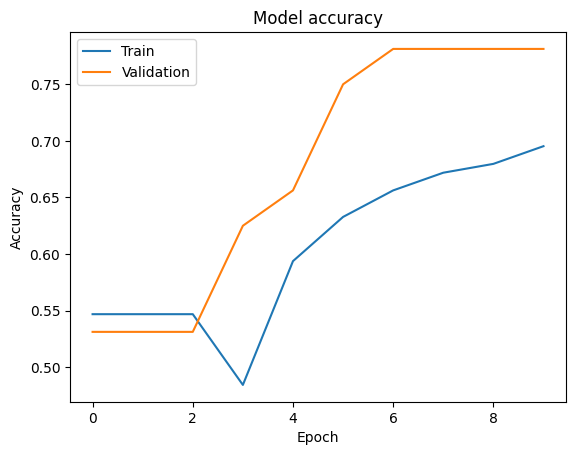

In [8]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

Plot training & validation loss values

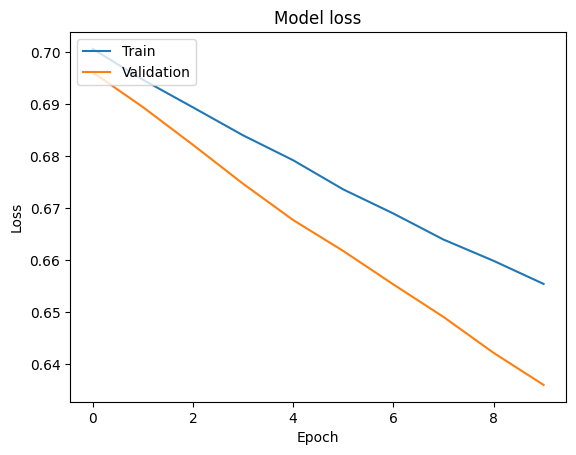

In [9]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

Generate a grid over the feature space

In [10]:
x_min, x_max = df['VisitDuration'].min() - 0.1, df['VisitDuration'].max() + 0.1
y_min, y_max = df['PagesVisited'].min() - 0.1, df['PagesVisited'].max() + 0.1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

Predict over the grid

In [11]:
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

313/313 [==============================] - 1s 4ms/step


Plot the contour and training examples

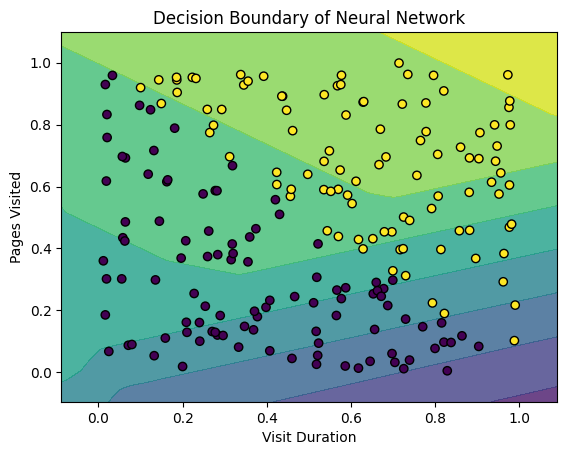

In [12]:
plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(df['VisitDuration'], df['PagesVisited'], c=df['Purchase'], edgecolor='k')
plt.xlabel('Visit Duration')
plt.ylabel('Pages Visited')
plt.title('Decision Boundary of Neural Network')
plt.show()